In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#2. 打开csv数据
with open('Data_O2_Oxidation_3.csv', encoding = 'UTF-8') as f:
    df = pd.read_csv(f)  #index_col=0 告诉第一列是索引
df
#first_column_header = df.columns[0]
#print(first_column_header)

,H_c,G_c,S_c,β-O-4_c,Rf,P_O,Tem,Rt,C_c,BETs,AcCom,OxiStat,rpm,NaOH_c,Yld
0,3.0,97.0,0.0,46.50,20.0,10.0,120,60,0.0,Missing,Missing,Missing,400,2.0,0.019780
1,3.0,97.0,0.0,46.50,20.0,10.0,150,60,0.0,Missing,Missing,Missing,400,2.0,0.034730
2,3.0,97.0,0.0,46.50,20.0,10.0,160,60,0.0,Missing,Missing,Missing,400,2.0,0.048530
3,3.0,97.0,0.0,46.50,20.0,10.0,170,60,0.0,Missing,Missing,Missing,400,2.0,0.036800
4,3.0,97.0,0.0,46.50,20.0,10.0,200,60,0.0,Missing,Missing,Missing,400,2.0,0.034730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,1.2,30.4,68.4,38.48,50.0,4.0,150,30,0.0,Missing,Missing,Missing,800,2.0,0.011905
235,1.2,30.4,68.4,38.48,50.0,4.0,150,30,1.0,21.988,CuO,2,800,2.0,0.015186
236,1.2,30.4,68.4,38.48,50.0,4.0,150,30,1.5,21.988,CuO,2,800,2.0,0.015605
237,1.2,30.4,68.4,38.48,50.0,4.0,150,30,2.0,21.988,CuO,2,800,2.0,0.015954


In [2]:
# 分割数据
df_O2_noC = df[df['C_c'] == 0]  # "C_c"列值为0的所有行   【行号不变的！】
df_O2_C = df[df['C_c'] != 0]  # "C_c"列值不为0的所有行

In [3]:
# 假设我们要删除的列是 'BETs', 'AcCom', 和 'OxiStat'
df_O2_noC = df_O2_noC.drop(['C_c', 'BETs', 'AcCom', 'OxiStat'], axis=1)

# 查看结果
df_O2_noC  #【行号不变的！】


,H_c,G_c,S_c,β-O-4_c,Rf,P_O,Tem,Rt,rpm,NaOH_c,Yld
0,3.0,97.0,0.0,46.50,20.0,10.0,120,60,400,2.0,0.019780
1,3.0,97.0,0.0,46.50,20.0,10.0,150,60,400,2.0,0.034730
2,3.0,97.0,0.0,46.50,20.0,10.0,160,60,400,2.0,0.048530
3,3.0,97.0,0.0,46.50,20.0,10.0,170,60,400,2.0,0.036800
4,3.0,97.0,0.0,46.50,20.0,10.0,200,60,400,2.0,0.034730
...,...,...,...,...,...,...,...,...,...,...,...
200,33.0,30.0,37.0,1.30,60.0,5.0,120,60,1045,2.0,0.001613
201,33.0,30.0,37.0,1.30,60.0,5.0,120,90,1045,2.0,0.001290
202,33.0,30.0,37.0,1.30,60.0,5.0,120,120,1045,2.0,0.001183
203,33.0,30.0,37.0,1.30,60.0,5.0,120,150,1045,2.0,0.001075


In [4]:
y = df_O2_noC.iloc[:, -1]
X = df_O2_noC.drop('Yld', axis = 1)
#X
y

0      0.019780
1      0.034730
2      0.048530
3      0.036800
4      0.034730
         ...   
200    0.001613
201    0.001290
202    0.001183
203    0.001075
234    0.011905
Name: Yld, Length: 184, dtype: float64

In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# 设置显示最大行数，None表示不限制显示的行数
pd.set_option('display.max_rows', None)

# 使用 MinMaxScaler 进行归一化
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_scaled

,H_c,G_c,S_c,β-O-4_c,Rf,P_O,Tem,Rt,rpm,NaOH_c
0,0.090909,0.988235,0.000000,0.804270,0.130435,1.000000,0.111111,0.186441,0.096774,1.000000
1,0.090909,0.988235,0.000000,0.804270,0.130435,1.000000,0.444444,0.186441,0.096774,1.000000
2,0.090909,0.988235,0.000000,0.804270,0.130435,1.000000,0.555556,0.186441,0.096774,1.000000
3,0.090909,0.988235,0.000000,0.804270,0.130435,1.000000,0.666667,0.186441,0.096774,1.000000
4,0.090909,0.988235,0.000000,0.804270,0.130435,1.000000,1.000000,0.186441,0.096774,1.000000
5,0.090909,0.988235,0.000000,0.804270,0.130435,1.000000,0.555556,0.016949,0.096774,1.000000
6,0.090909,0.988235,0.000000,0.804270,0.130435,1.000000,0.555556,0.084746,0.096774,1.000000
7,0.090909,0.988235,0.000000,0.804270,0.130435,1.000000,0.555556,0.288136,0.096774,1.000000
8,0.090909,0.988235,0.000000,0.804270,0.130435,1.000000,0.555556,0.593220,0.096774,1.000000
9,0.090909,0.988235,0.000000,0.804270,0.478261,0.315789,0.000000,0.186441,0.580645,1.000000


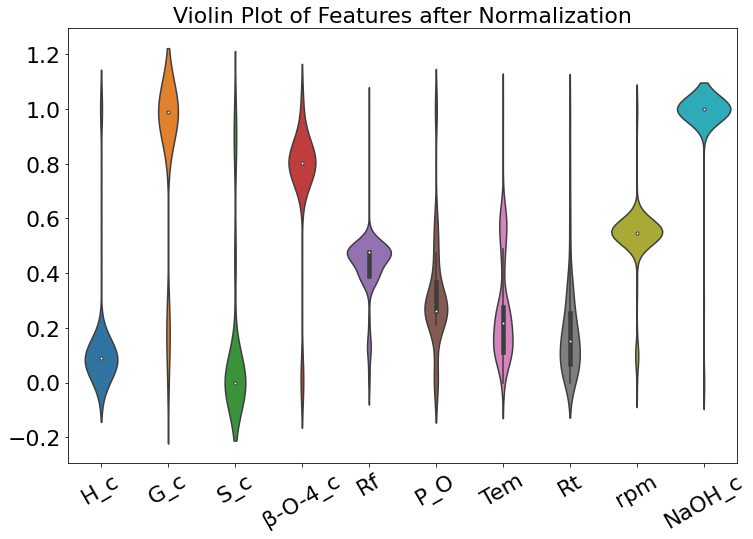

In [6]:

# 归一化后的数据与目标重新合并
df_scaled = pd.concat([X_scaled, y], axis=1)

# 绘制小提琴图
plt.figure(figsize=(12, 8))
sns.violinplot(data=X_scaled)

# 调整刻度字体大小
plt.xticks(rotation=30, fontsize=22)  # x轴刻度字体大小为12
plt.yticks(fontsize=22)  # y轴刻度字体大小为12

plt.title('Violin Plot of Features after Normalization', fontsize=22)  # 调整标题字体大小

# 保存图片
plt.savefig('violin_plot.png')  # 保存为 PNG 文件

plt.show()

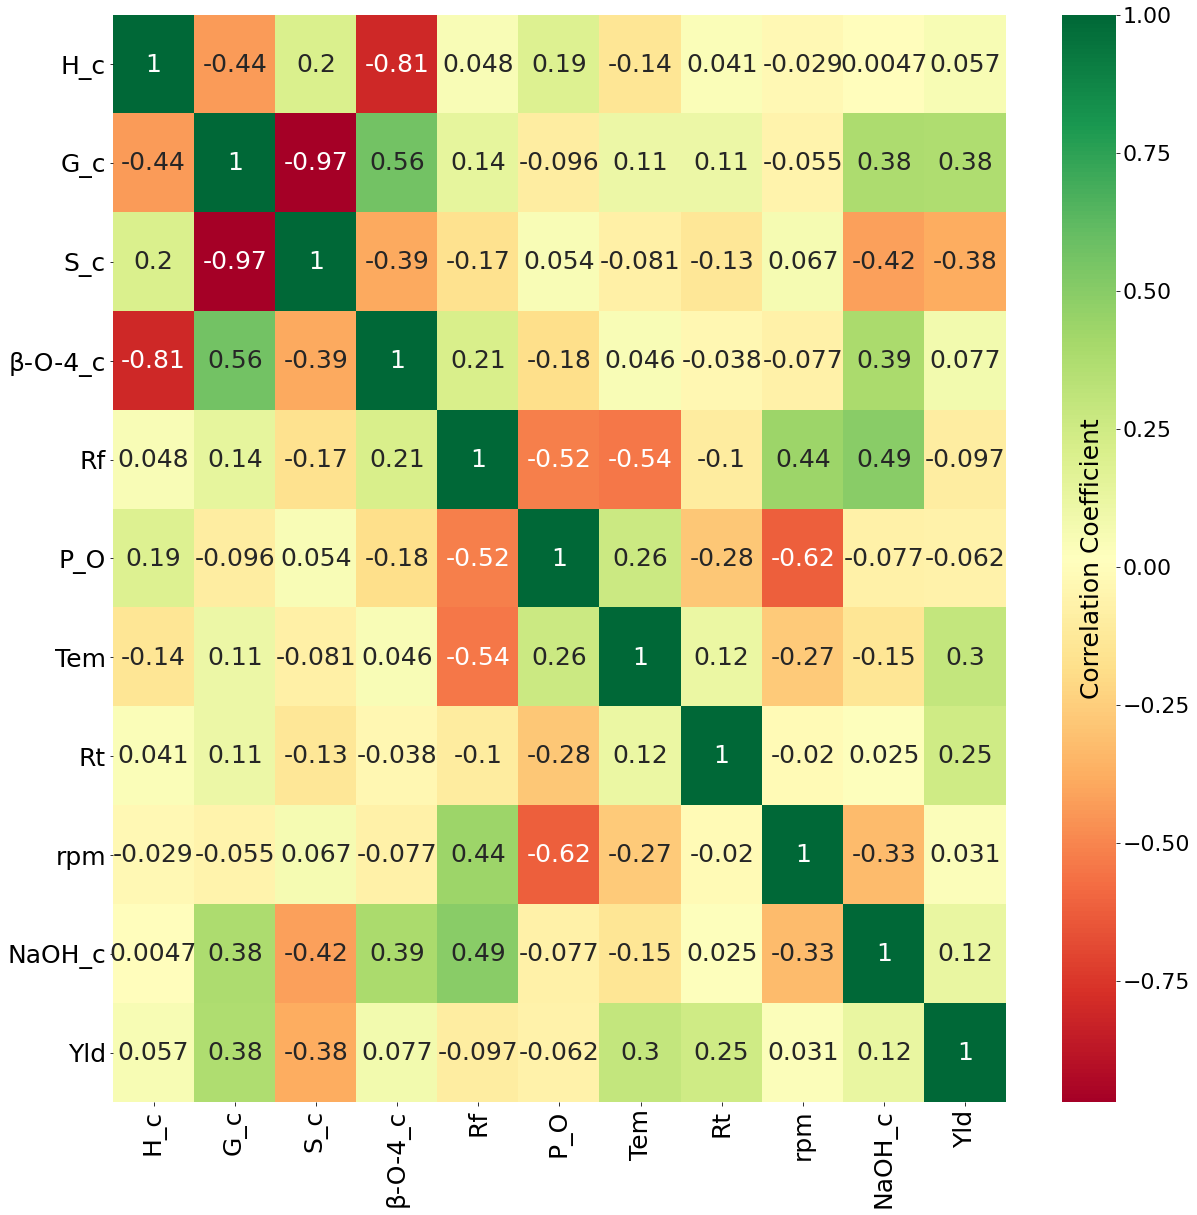

In [7]:
#2. 画热力图(未筛选描述符)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,20))

heatmap = sns.heatmap(df_scaled.corr(), 
            cmap='RdYlGn', 
            annot=True, 
            annot_kws={"size": 25},  # 调整热力图中数字字体大小
            cbar_kws={'label': 'Correlation Coefficient'})  # 可选: 增加颜色条的标签

# 调整颜色条数字字体大小
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=22)  # 设置颜色条刻度字体大小

# 设置颜色条标签字体居中并设置字体颜色为白色
cbar.ax.set_ylabel('Correlation Coefficient', fontsize=25, color='black', labelpad=-30)  # 字体大小，颜色，间距
cbar.ax.yaxis.set_label_position('left')  # 确保标签在颜色条的右侧
cbar.ax.yaxis.label.set_verticalalignment('center')  # 标签垂直居中

# 调整坐标轴刻度的字体大小
plt.xticks(fontsize=25, rotation=90)  # x轴字体大小和旋转角度
plt.yticks(fontsize=25, rotation=0)   # y轴字体大小


plt.savefig('热力图.tiff', dpi = 770)

In [8]:
#3.机器学习GBR
df = pd.DataFrame(X_scaled)
X = df

In [9]:
#数据划分
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                   random_state = 3)    # 把样品分为测试和验证集，用split进行分割，测试集的比例为0.2，random_state意思是随机切割、抽取

In [10]:
#1. 梯度提升回归

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
#超参数网格化搜索方法
from sklearn.model_selection import GridSearchCV

# 定义模型
gbr = GradientBoostingRegressor()

# 定义要搜索的参数网格
param_grid = {
    'n_estimators': [100, 200, 300],  # 树的数量
    'learning_rate': [0.01, 0.1, 0.2],  # 学习率
    'max_depth': [3, 4, 5]  # 树的最大深度
}

# 定义评分方法
scorer = make_scorer(r2_score)  # 这里以R2分数为例，也可以使用RMSE

# 创建GridSearchCV对象
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, scoring=scorer, cv=12)

# 拟合数据
grid_search.fit(X_train, y_train)

# 输出最优参数和对应的分数
print("Best parameters:", grid_search.best_params_)
print("Best R2 score:", grid_search.best_score_)



Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}
Best R2 score: 0.7933084784447278


In [11]:
# 使用最优参数预测
best_gbr = grid_search.best_estimator_

training R2 = 0.999
test R2 = 0.654
RMSE(training)0.001
RMSE(test)0.014


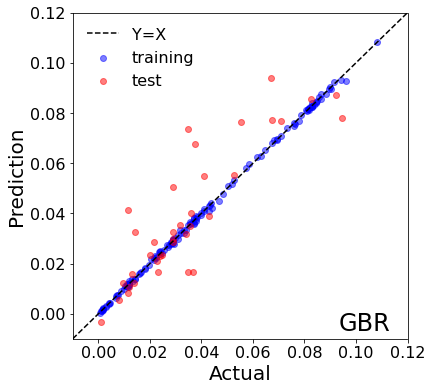

In [12]:
# 使用最优模型进行预测

y_pred_train_gbr = best_gbr.predict(X_train)
y_pred_test_gbr = best_gbr.predict(X_test)

#作图
import matplotlib.pyplot as plt

plt.figure(figsize = (6, 6))
plt.scatter(y_train, y_pred_train_gbr, alpha = 0.5, color = 'b', label = 'training')  #alpha设置透明度
plt.scatter(y_test, y_pred_test_gbr, alpha = 0.5, color = 'r', label = 'test')

# 添加 y=x 线
plt.plot([min(-0.01, 0.14), max(-0.01, 0.14)],  # X 轴范围
         [min(-0.01, 0.14), max(-0.01, 0.14)],  # Y 轴范围
         'k--', label='Y=X')  # 'k--' 是黑色虚线，您可以根据需要修改颜色和线型

# 设置图例字体大小
plt.legend(fontsize=16, frameon=False)
plt.xlabel('Actual', fontsize=20)
plt.ylabel('Prediction', fontsize=20)

# 设置轴刻度的字体大小
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# 设置X轴和Y轴的范围
plt.xlim([-0.01, 0.12])  # 替换min_value_x和max_value_x为您希望的范围的最小值和最大值
plt.ylim([-0.01, 0.12])  # 替换min_value_y和max_value_y为您希望的范围的最小值和最大值

# 在图的右上角添加文本
plt.text(0.95, 0.01, 'GBR', fontsize=24, ha='right', va='bottom', transform=plt.gca().transAxes)

plt.savefig('梯度提升回归不交叉验证.tiff', dpi = 720, bbox_inches='tight')

#算均方误差
from sklearn.metrics import mean_squared_error #引用均方差

print('training R2 = %.3f' %best_gbr.score(X_train, y_train))
print('test R2 = %.3f' %best_gbr.score(X_test, y_test))
rmse_tr_gbr = mean_squared_error(y_train, y_pred_train_gbr, squared = False) #squared = False 是表示对均方差求根，及得到均方根误差
rmse_te_gbr = mean_squared_error(y_test, y_pred_test_gbr, squared = False)
print('RMSE(training)%.3f'%rmse_tr_gbr)
print('RMSE(test)%.3f'%rmse_te_gbr)

Best R2 score (Linear Regression): -62.962505707352214
training R2 = 0.378
test R2 = 0.226
RMSE(training) = 0.023
RMSE(test) = 0.020


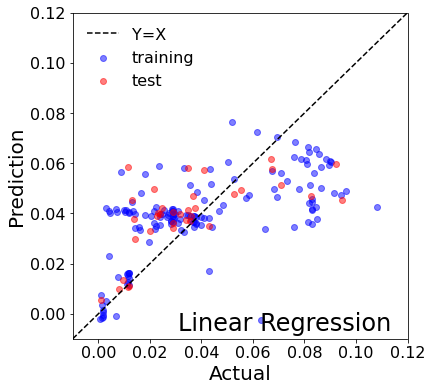

In [13]:
#2. 线性回归

# 导入必要库
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
import matplotlib.pyplot as plt

# 分割数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# 定义线性回归模型
lr = LinearRegression()

# 定义网格搜索的参数（线性回归没有超参数，所以我们可以直接使用默认参数）
# 这里使用 GridSearchCV 主要是为了保持与之前流程的一致性
param_grid = {}  # 线性回归没有超参数需要调节，网格为空

# 定义评分方法
scorer = make_scorer(r2_score)

# 创建 GridSearchCV 对象
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid, scoring=scorer, cv=12)

# 拟合数据
grid_search_lr.fit(X, y)

# 输出最优参数和对应的分数（线性回归没有超参数，因此显示的只是 R2 得分）
print("Best R2 score (Linear Regression):", grid_search_lr.best_score_)

# 使用最优模型进行预测
best_lr = grid_search_lr.best_estimator_

y_pred_train_lr = best_lr.predict(X_train)
y_pred_test_lr = best_lr.predict(X_test)

# 绘图
plt.figure(figsize=(6, 6))
plt.scatter(y_train, y_pred_train_lr, alpha=0.5, color='b', label='training')
plt.scatter(y_test, y_pred_test_lr, alpha=0.5, color='r', label='test')

# 添加 y=x 线
plt.plot([min(-0.01, 0.14), max(-0.01, 0.14)], 
         [min(-0.01, 0.14), max(-0.01, 0.14)], 
         'k--', label='Y=X')

# 设置图例和标签
plt.legend(fontsize=16, frameon=False)
plt.xlabel('Actual', fontsize=20)
plt.ylabel('Prediction', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# 设置X轴和Y轴的范围
plt.xlim([-0.01, 0.12])
plt.ylim([-0.01, 0.12])

# 添加文本
plt.text(0.95, 0.01, 'Linear Regression', fontsize=24, ha='right', va='bottom', transform=plt.gca().transAxes)

# 保存图像
plt.savefig('线性回归不交叉验证.tiff', dpi=720, bbox_inches='tight')

# 输出 R2 和均方根误差
print('training R2 = %.3f' % best_lr.score(X_train, y_train))
print('test R2 = %.3f' % best_lr.score(X_test, y_test))

rmse_tr_lr = mean_squared_error(y_train, y_pred_train_lr, squared=False)
rmse_te_lr = mean_squared_error(y_test, y_pred_test_lr, squared=False)

print('RMSE(training) = %.3f' % rmse_tr_lr)
print('RMSE(test) = %.3f' % rmse_te_lr)


In [14]:
#3. 随机森林回归

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# 定义模型
rfr = RandomForestRegressor()

# 定义要搜索的参数网格
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # 树的数量
    'max_depth': [3, 4, 5],  # 树的最大深度
    'min_samples_split': [2, 5, 10]  # 节点分裂所需的最小样本数
}

# 定义评分方法
scorer_rf = make_scorer(r2_score)  # 使用R2分数

# 创建GridSearchCV对象
grid_search_rf = GridSearchCV(estimator=rfr, param_grid=param_grid_rf, scoring=scorer_rf, cv=10)

# 拟合数据
grid_search_rf.fit(X_train, y_train)

# 输出最优参数和对应的分数
print("Best parameters:", grid_search_rf.best_params_)
print("Best R2 score:", grid_search_rf.best_score_)

Best parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
Best R2 score: 0.7124809113305035


training R2 = 0.917
test R2 = 0.498
RMSE(training)0.008
RMSE(test)0.016


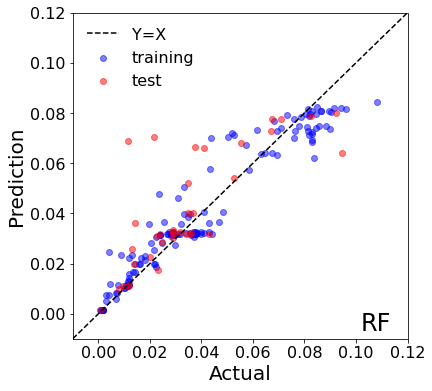

In [15]:

# 使用最优参数预测
best_rfr = grid_search_rf.best_estimator_

# 使用最优模型进行预测
y_pred_train_rf = best_rfr.predict(X_train)
y_pred_test_rf = best_rfr.predict(X_test)

# 作图
plt.figure(figsize = (6, 6))
plt.scatter(y_train, y_pred_train_rf, alpha = 0.5, color = 'b', label = 'training')  # alpha设置透明度
plt.scatter(y_test, y_pred_test_rf, alpha = 0.5, color = 'r', label = 'test')

# 添加 y=x 线
plt.plot([min(-0.01, 0.14), max(-0.01, 0.14)],  # X 轴范围
         [min(-0.01, 0.14), max(-0.01, 0.14)],  # Y 轴范围
         'k--', label='Y=X')  # 'k--' 是黑色虚线

# 设置图例字体大小
plt.legend(fontsize=16, frameon=False)
plt.xlabel('Actual', fontsize=20)
plt.ylabel('Prediction', fontsize=20)

# 设置轴刻度的字体大小
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# 设置X轴和Y轴的范围
plt.xlim([-0.01, 0.12])  # 替换min_value_x和max_value_x为您希望的范围的最小值和最大值
plt.ylim([-0.01, 0.12])  # 替换min_value_y和max_value_y为您希望的范围的最小值和最大值

# 在图的右上角添加文本
plt.text(0.95, 0.01, 'RF', fontsize=24, ha='right', va='bottom', transform=plt.gca().transAxes)

plt.savefig('随机森林回归_网格化搜索_不交叉验证.tiff', dpi = 720, bbox_inches='tight')

# 计算R2和均方误差
print('training R2 = %.3f' %best_rfr.score(X_train, y_train))
print('test R2 = %.3f' %best_rfr.score(X_test, y_test))
rmse_tr_rf = mean_squared_error(y_train, y_pred_train_rf, squared=False)  # 均方根误差
rmse_te_rf = mean_squared_error(y_test, y_pred_test_rf, squared=False)
print('RMSE(training)%.3f'%rmse_tr_rf)
print('RMSE(test)%.3f'%rmse_te_rf)

In [16]:
# 3.2 尝试使用贝叶斯优化搜索最优超参数，进行随机森林
from hyperopt import hp, tpe, fmin, Trials
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# 定义目标函数
def objective(params):
    gbr = GradientBoostingRegressor(
        n_estimators=int(params['n_estimators']),
        learning_rate=params['learning_rate'],
        max_depth=int(params['max_depth']),
        min_samples_split=int(params['min_samples_split']),
        subsample=params['subsample']
    )
    
    # 使用交叉验证评估模型性能
    score = cross_val_score(gbr, X_train, y_train, cv=10, scoring='r2').mean()
    
    # 目标是最大化 R² 分数，因此返回负值作为最小化目标
    return -score

# 定义超参数搜索空间
space = {
    'n_estimators': hp.quniform('n_estimators', 100, 500, 50),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 10, 1),
    'subsample': hp.uniform('subsample', 0.6, 1.0),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 5, 1),  # 叶节点最小样本数
    'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2'])  # 最大特征数
}

# 创建一个用于存储调参过程的 Trials 对象
trials = Trials()

# 使用贝叶斯优化算法（TPE）进行参数搜索
best_params = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,  # 指定最大评估次数
    trials=trials,
    rstate=np.random.default_rng(42)  # 设置随机种子
)

# 输出最佳参数
print("Best parameters found by Hyperopt:", best_params)


100%|█████████████████████████████████████████████| 100/100 [02:12<00:00,  1.33s/trial, best loss: -0.8052104464667126]
Best parameters found by Hyperopt: {'learning_rate': 0.14841437287096368, 'max_depth': 8.0, 'max_features': 0, 'min_samples_leaf': 2.0, 'min_samples_split': 8.0, 'n_estimators': 450.0, 'subsample': 0.6257147453238197}


In [17]:
# 使用最优参数重新训练随机森林模型
best_rfr = RandomForestRegressor(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    max_features=['auto', 'sqrt', 'log2'][best_params['max_features']]  # 使用找到的最优值
)

# 拟合训练数据
best_rfr.fit(X_train, y_train)

# 进行预测
y_pred_train_rf = best_rfr.predict(X_train)
y_pred_test_rf = best_rfr.predict(X_test)

# 输出模型性能
print('training R2 = %.3f' % best_rfr.score(X_train, y_train))
print('test R2 = %.3f' % best_rfr.score(X_test, y_test))

# 计算均方根误差（RMSE）
rmse_tr_rf = mean_squared_error(y_train, y_pred_train_rf, squared=False)
rmse_te_rf = mean_squared_error(y_test, y_pred_test_rf, squared=False)
print('RMSE(training): %.3f' % rmse_tr_rf)
print('RMSE(test): %.3f' % rmse_te_rf)

training R2 = 0.897
test R2 = 0.539
RMSE(training): 0.009
RMSE(test): 0.016


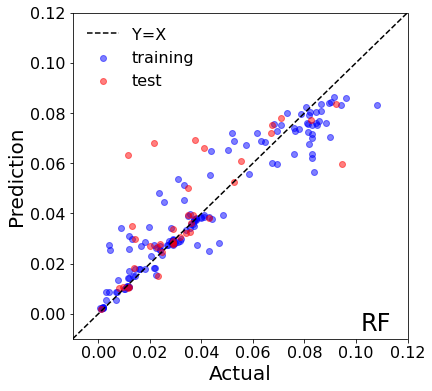

In [18]:

# 作图
plt.figure(figsize = (6, 6))
plt.scatter(y_train, y_pred_train_rf, alpha = 0.5, color = 'b', label = 'training')  # alpha设置透明度
plt.scatter(y_test, y_pred_test_rf, alpha = 0.5, color = 'r', label = 'test')

# 添加 y=x 线
plt.plot([min(-0.01, 0.14), max(-0.01, 0.14)],  # X 轴范围
         [min(-0.01, 0.14), max(-0.01, 0.14)],  # Y 轴范围
         'k--', label='Y=X')  # 'k--' 是黑色虚线

# 设置图例字体大小
plt.legend(fontsize=16, frameon=False)
plt.xlabel('Actual', fontsize=20)
plt.ylabel('Prediction', fontsize=20)

# 设置轴刻度的字体大小
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# 设置X轴和Y轴的范围
plt.xlim([-0.01, 0.12])  # 替换min_value_x和max_value_x为您希望的范围的最小值和最大值
plt.ylim([-0.01, 0.12])  # 替换min_value_y和max_value_y为您希望的范围的最小值和最大值

# 在图的右上角添加文本
plt.text(0.95, 0.01, 'RF', fontsize=24, ha='right', va='bottom', transform=plt.gca().transAxes)

plt.savefig('随机森林_贝叶斯优化_回归不交叉验证.tiff', dpi = 720, bbox_inches='tight')


In [28]:
# 4. 基于贝叶斯优化的决策树回归

from hyperopt import hp, tpe, fmin, Trials
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# 定义目标函数
def objective(params):
    # 创建决策树回归器，并使用传入的超参数
    dtr = DecisionTreeRegressor(
        max_depth=int(params['max_depth']),
        min_samples_split=int(params['min_samples_split']),
        min_samples_leaf=int(params['min_samples_leaf']),
        max_features=params['max_features']
    )
    
    # 使用交叉验证评估模型性能，这里使用 10 折交叉验证
    score = cross_val_score(dtr, X_train, y_train, cv=10, scoring='r2').mean()
    
    # 目标是最大化 R² 分数，因此返回负的 R² 作为最小化目标
    return -score

# 定义超参数搜索空间
space = {
    'max_depth': hp.quniform('max_depth', 3, 20, 1),  # 树的最大深度，离散均匀分布
    'min_samples_split': hp.quniform('min_samples_split', 2, 20, 1),  # 节点分裂所需的最小样本数
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 10, 1),  # 叶节点最小样本数
    'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2', None])  # 最大特征数选择
}

# 创建一个用于存储调参过程的 Trials 对象
trials = Trials()

# 使用贝叶斯优化算法（TPE）进行参数搜索
best_params = fmin(
    fn=objective,  # 目标函数
    space=space,  # 超参数搜索空间
    algo=tpe.suggest,  # 贝叶斯优化算法
    max_evals=100,  # 最大评估次数
    trials=trials,  # 记录调参过程
    rstate=np.random.default_rng(42)  # 设置随机种子
)

# 输出最佳超参数
print("Best parameters found by Hyperopt:", best_params)

# 使用最优参数重新训练决策树模型
best_dtr = DecisionTreeRegressor(
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    max_features=['auto', 'sqrt', 'log2', None][best_params['max_features']]  # 使用找到的最优值
)

# 拟合训练数据
best_dtr.fit(X_train, y_train)

# 进行预测
y_pred_train_dt = best_dtr.predict(X_train)
y_pred_test_dt = best_dtr.predict(X_test)

# 输出模型性能
print('training R2 = %.3f' % best_dtr.score(X_train, y_train))
print('test R2 = %.3f' % best_dtr.score(X_test, y_test))

# 计算均方根误差（RMSE）
rmse_tr_dt = mean_squared_error(y_train, y_pred_train_dt, squared=False)
rmse_te_dt = mean_squared_error(y_test, y_pred_test_dt, squared=False)
print('RMSE(training): %.3f' % rmse_tr_dt)
print('RMSE(test): %.3f' % rmse_te_dt)


100%|█████████████████████████████████████████████| 100/100 [00:03<00:00, 28.48trial/s, best loss: -0.6215724535512978]
Best parameters found by Hyperopt: {'max_depth': 16.0, 'max_features': 3, 'min_samples_leaf': 3.0, 'min_samples_split': 12.0}
training R2 = 0.900
test R2 = 0.528
RMSE(training): 0.009
RMSE(test): 0.016


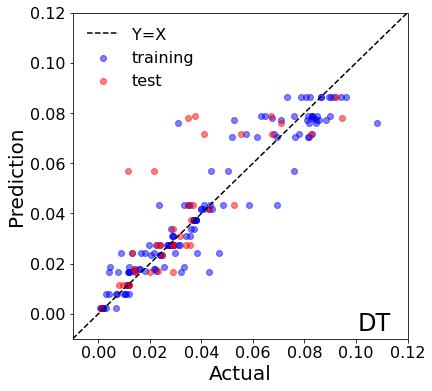

In [29]:
# 作图
plt.figure(figsize = (6, 6))
plt.scatter(y_train, y_pred_train_dt, alpha = 0.5, color = 'b', label = 'training')  # alpha设置透明度
plt.scatter(y_test, y_pred_test_dt, alpha = 0.5, color = 'r', label = 'test')

# 添加 y=x 线
plt.plot([min(-0.01, 0.14), max(-0.01, 0.14)],  # X 轴范围
         [min(-0.01, 0.14), max(-0.01, 0.14)],  # Y 轴范围
         'k--', label='Y=X')  # 'k--' 是黑色虚线

# 设置图例字体大小
plt.legend(fontsize=16, frameon=False)
plt.xlabel('Actual', fontsize=20)
plt.ylabel('Prediction', fontsize=20)

# 设置轴刻度的字体大小
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# 设置X轴和Y轴的范围
plt.xlim([-0.01, 0.12])  # 替换min_value_x和max_value_x为您希望的范围的最小值和最大值
plt.ylim([-0.01, 0.12])  # 替换min_value_y和max_value_y为您希望的范围的最小值和最大值

# 在图的右上角添加文本
plt.text(0.95, 0.01, 'DT', fontsize=24, ha='right', va='bottom', transform=plt.gca().transAxes)

plt.savefig('决策树回归_贝叶斯优化_回归不交叉验证.tiff', dpi = 720, bbox_inches='tight')

In [30]:
#3. 决策树回归_网格化搜索_不交叉验证

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 定义模型
dtr = DecisionTreeRegressor()

# 定义要搜索的参数网格
param_grid_dt = {
    'max_depth': [3, 4, 5, 10, 15],  # 树的最大深度
    'min_samples_split': [2, 5, 10],  # 节点分裂所需的最小样本数
    'min_samples_leaf': [1, 2, 5]  # 叶节点的最小样本数
}

# 定义评分方法
scorer_dt = make_scorer(r2_score)  # 使用R2分数

# 创建GridSearchCV对象
grid_search_dt = GridSearchCV(estimator=dtr, param_grid=param_grid_dt, scoring=scorer_dt, cv=10)

# 拟合数据
grid_search_dt.fit(X_train, y_train)

# 输出最优参数和对应的分数
print("Best parameters:", grid_search_dt.best_params_)
print("Best R2 score:", grid_search_dt.best_score_)


Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best R2 score: 0.6287811497237624


training R2 = 0.999
test R2 = 0.567
RMSE(training): 0.001
RMSE(test): 0.015


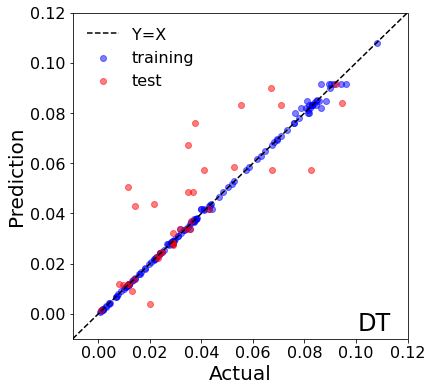

In [31]:
# 使用最优参数预测
best_dtr = grid_search_dt.best_estimator_

# 使用最优模型进行预测
y_pred_train_dt = best_dtr.predict(X_train)
y_pred_test_dt = best_dtr.predict(X_test)

# 作图
plt.figure(figsize=(6, 6))
plt.scatter(y_train, y_pred_train_dt, alpha=0.5, color='b', label='training')  # alpha设置透明度
plt.scatter(y_test, y_pred_test_dt, alpha=0.5, color='r', label='test')

# 添加 y=x 线
plt.plot([min(-0.01, 0.14), max(-0.01, 0.14)],  # X 轴范围
         [min(-0.01, 0.14), max(-0.01, 0.14)],  # Y 轴范围
         'k--', label='Y=X')  # 'k--' 是黑色虚线

# 设置图例字体大小
plt.legend(fontsize=16, frameon=False)
plt.xlabel('Actual', fontsize=20)
plt.ylabel('Prediction', fontsize=20)

# 设置轴刻度的字体大小
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# 设置X轴和Y轴的范围
plt.xlim([-0.01, 0.12])  # 替换min_value_x和max_value_x为您希望的范围的最小值和最大值
plt.ylim([-0.01, 0.12])  # 替换min_value_y和max_value_y为您希望的范围的最小值和最大值

# 在图的右上角添加文本
plt.text(0.95, 0.01, 'DT', fontsize=24, ha='right', va='bottom', transform=plt.gca().transAxes)

plt.savefig('决策树回归_网格化搜索_不交叉验证.tiff', dpi=720, bbox_inches='tight')

# 计算R2和均方误差
print('training R2 = %.3f' % best_dtr.score(X_train, y_train))
print('test R2 = %.3f' % best_dtr.score(X_test, y_test))
rmse_tr_dt = mean_squared_error(y_train, y_pred_train_dt, squared=False)  # 均方根误差
rmse_te_dt = mean_squared_error(y_test, y_pred_test_dt, squared=False)
print('RMSE(training): %.3f' % rmse_tr_dt)
print('RMSE(test): %.3f' % rmse_te_dt)
